<a href="https://colab.research.google.com/github/BlessMario/MachineIntelligence/blob/main/02_preprocessing_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAS Machine Learning: Lecture 02

## 0 - Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from io import StringIO

## 1 - Loading the Dataset into a Pandas DataFrame

We first load the CSV Iris Dataset into a Pandas `DataFrame` object:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%ls -la sample_data/iris.csv

ls: cannot access 'sample_data/iris.csv': No such file or directory


In [ ]:
df_iris = pd.read_csv('sample_data/iris.csv')

Next, we display the first 5 rows:

In [ ]:
df_iris.head()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


and then we also display the last 5 rows:

In [ ]:
df_iris.tail()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


Notice, that the dataframe has one column named `Id`, which for our case is not so relevant. Because of that, we can also drop specific columns:

In [ ]:
df_iris.tail(15)

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
135,136,7.7,3.0,6.1,2.3,Iris-virginica
136,137,6.3,3.4,5.6,2.4,Iris-virginica
137,138,6.4,3.1,5.5,1.8,Iris-virginica
138,139,6.0,3.0,4.8,1.8,Iris-virginica
139,140,6.9,3.1,5.4,2.1,Iris-virginica
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica


In [ ]:
df_iris.drop(labels=['Id'], axis=1, inplace=True)
df_iris.tail()

,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


One good practice is to rename the name of the columns to a name that is easily accesible, ideally by removing any `blank spaces`, `special characters`, etc. For that, we use the function `rename`.

In [ ]:
#df_iris.drop(lables=['Id'], axis=1, inplace=True)
df_iris = df_iris.rename(columns={'SepalLength[cm]': 'sepal_length', 'SepalWidth[cm]': 'sepal_width'})
df_iris = df_iris.rename(columns={'PetalLength[cm]': 'petal_length', 'PetalWidth[cm]': 'petal_width', 'Species': 'species'})

In [ ]:
df_iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


We can also display the size of our dataset, which is in the form of a Pandas `DataFrame`:

In [ ]:
df_iris.shape

(150, 5)

Finally, we can display generall statistics about our data frame by using `columns`, `info()`, or `desribe()`

In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We use the `info()` method to print a summary of the DataFrame and to check data the types and to verify that its content is non-null.

In [ ]:
df_iris...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We can also use the `isnull()` to check for every single feature type, whether there are missing values 

In [ ]:
missing_df = ...
print(missing_df)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
df_iris...

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df_iris...

,species
count,150
unique,3
top,Iris-versicolor
freq,50


In [ ]:
df_iris[...]...

sepal_length    5.006
sepal_width     3.418
petal_length    1.464
petal_width     0.244
dtype: float64

In [ ]:
df_iris[...]...

sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
dtype: float64

In [ ]:
df_iris[...]...

sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64

In [ ]:
columns_to_show = ['sepal_length',	'sepal_width',	'petal_length',	'petal_width']
df_iris...

sepal_length                 ... petal_width          
                        mean       std amin  ...         std amin amax
species                                      ...                      
Iris-setosa            5.006  0.352490  4.3  ...    0.107210  0.1  0.6
Iris-versicolor        5.936  0.516171  4.9  ...    0.197753  1.0  1.8
Iris-virginica         6.588  0.635880  4.9  ...    0.274650  1.4  2.5

[3 rows x 16 columns]

For categorical features (type `object`) or boolean features (type`bool`), we can use the value_counts method to generate histograms of the data:

In [ ]:
df_iris[...]...

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


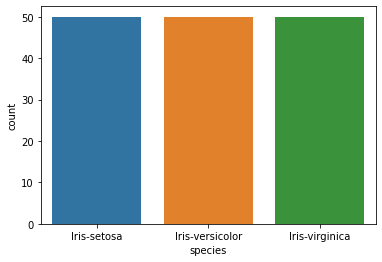

In [ ]:
sns.countplot(df_iris['species'])

It's also a good idea to display the distributions of all of the features separately.

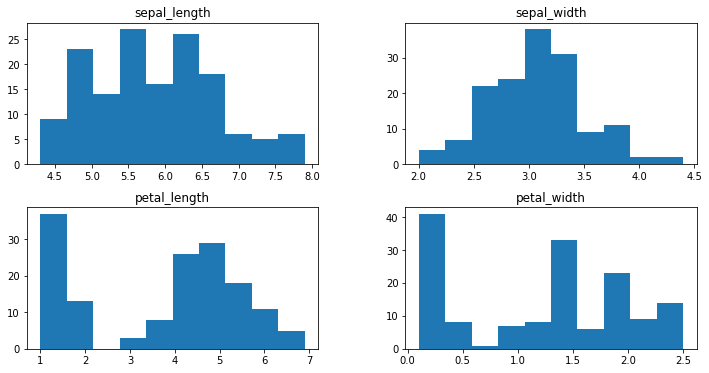

In [ ]:
df_iris...
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

We can also display box-plots for each independent feature (petal length, petal width, sepal length, sepal width) associated to each class.

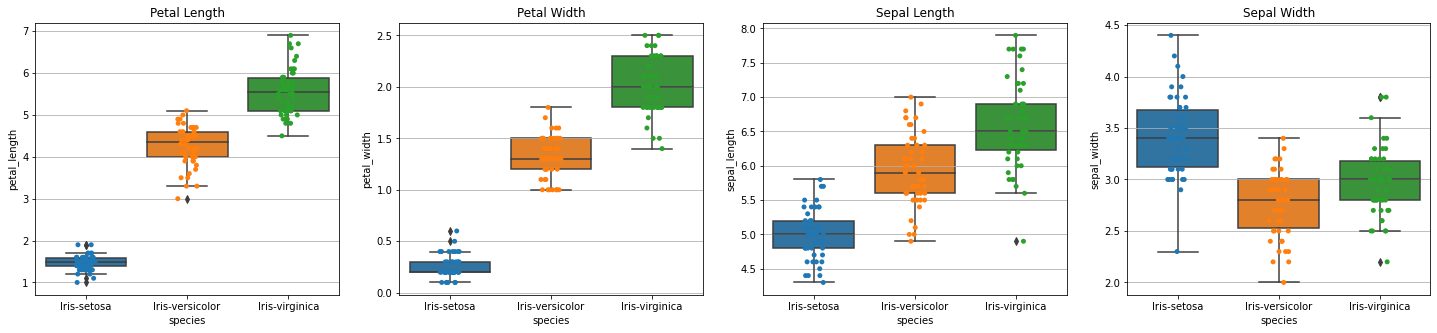

In [ ]:
plt.figure(figsize=(25,5))
ax1 = plt.subplot(1,4,1)
ax1.grid()
ax1.title.set_text('Petal Length')
sns.boxplot(..., ..., ...)
sns.stripplot(..., ..., ..., jitter=True, edgecolor="gray")

ax2 = plt.subplot(1,4,2)
ax2.grid()
ax2.title.set_text('Petal Width')
sns.boxplot(..., ..., ...)
sns.stripplot(..., ..., ..., jitter=True, edgecolor="gray")

ax3 = plt.subplot(1,4,3)
ax3.grid()
ax3.title.set_text('Sepal Length')
sns.boxplot(x=..., y='sepal_length', data=...)
sns.stripplot(x=..., y='sepal_length', data=..., jitter=True, edgecolor="gray")

ax4 = plt.subplot(1,4,4)
ax4.grid()
ax4.title.set_text('Sepal Width')
sns.boxplot(x=..., y=..., data=...)
sns.stripplot(x=..., y=..., data=..., jitter=True, edgecolor="gray")

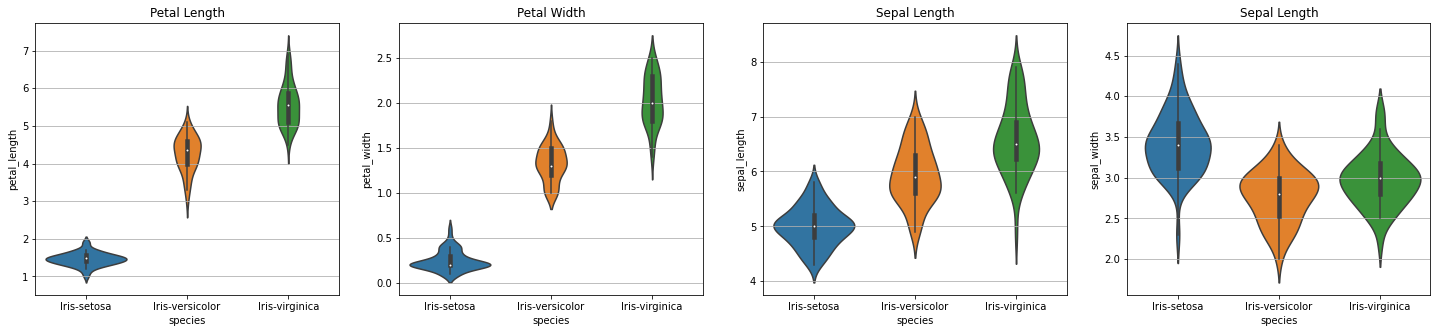

In [ ]:
plt.figure(figsize=(25,5))
ax1 = plt.subplot(1,4,1)
ax1.grid()
ax1.title.set_text('Petal Length')
sns.violinplot(..., ..., ...)

ax2 = plt.subplot(1,4,2)
ax2.grid()
ax2.title.set_text('Petal Width')
sns.violinplot(..., ..., ...)

ax3 = plt.subplot(1,4,3)
ax3.grid()
ax3.title.set_text('Sepal Length')
sns.violinplot(..., ..., ...)

ax4 = plt.subplot(1,4,4)
ax4.grid()
ax4.title.set_text('Sepal Length')
sns.violinplot(..., ..., ...)

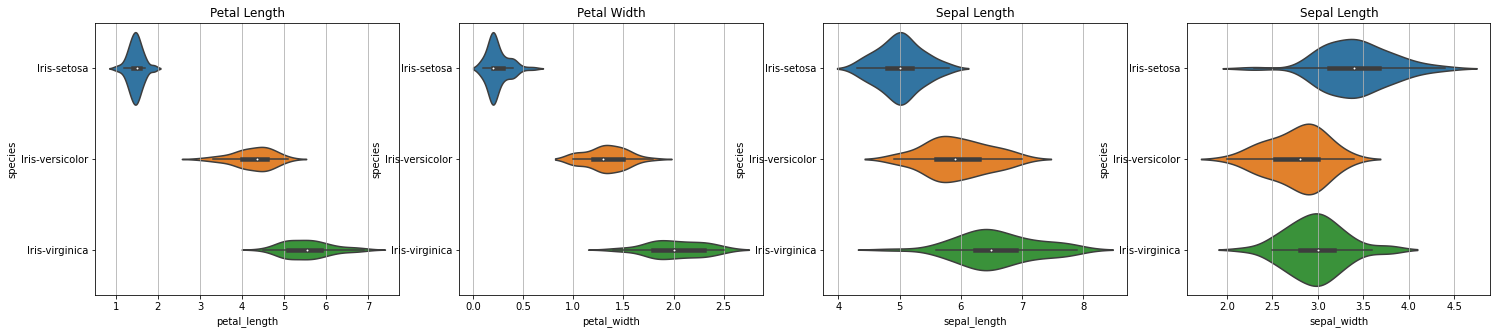

In [ ]:
plt.figure(figsize=(25,5))
ax1 = plt.subplot(1,4,1)
ax1.grid()
ax1.title.set_text('Petal Length')
sns.violinplot(..., ..., ...)

ax2 = plt.subplot(1,4,2)
ax2.grid()
ax2.title.set_text('Petal Width')
sns.violinplot(..., ..., ...)

ax3 = plt.subplot(1,4,3)
ax3.grid()
ax3.title.set_text('Sepal Length')
sns.violinplot(..., ..., ...)

ax4 = plt.subplot(1,4,4)
ax4.grid()
ax4.title.set_text('Sepal Length')
sns.violinplot(..., ..., ...)

For more examples on data visualisation, refer to the [seaborn tutorial](https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial).

## 2 - Mapping Features into a NumPy Array

In the next code cell, we first select two features `petal_length` and `petal_width`and then access the underlying Numpy Array embedded in the DataFrame via the `.values` attribute.

In [ ]:
X = df_iris[[..., ...]]...
print(X.shape)

(150, 2)


We display the first 5 entries of the dataset:

In [ ]:
X[:5, :]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

## 3 - Mapping Class Labels into a NumPy Array

As the class labels are in the form of `strings`, we need to map those values to a new `int` (integer) representation, in which each class label is then mapped to a unique single number. To do so, we add a new column named `class_label` to the data frame:

In [ ]:
label_dict = {'setosa': 0,
              'versicolor': 1,
              'virginica': 2}

df_iris['class_label'] = df_iris['species'].map(label_dict)
df_iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,class_label
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,2


Then, similar as above, we reference the underlying NumPy array via the `.values` attribute and assign those values to a variable `y`:

In [ ]:
y = df_iris[...]...
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 4 - Visualiting multi-dimensional Datasets

**t-Distributed Stochastic Neighbor Embedding (t-SNE)** is a technique for dimensionality reduction and used for the visualization of high-dimensional datasets. It was published in [JMLR 2008](https://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf).

In [ ]:
PALETTE = sns.color_palette('deep', n_colors=3)
CMAP = ListedColormap(PALETTE.as_hex()) # color map

In [ ]:
def plot_iris_2d(df, x, y, title, label_name='class_label', xlabel='1st eigenvector', ylabel='2nd eigenvector'):
    sns.set_style("darkgrid")
    
    plt.scatter(x, y,
        c=df[label_name],
        cmap=CMAP,
        s=70)
    
    plt.title(title, fontsize=20, y=1.03)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

In [ ]:
def plot_iris_3d(df, x, y, z, title, label_name='class_label'):
    sns.set_style('whitegrid')
    
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    
    ax.scatter(x, y, z,
               c=df[label_name],
               cmap=CMAP,
               s=40)
    
    ax.set_title(title, fontsize=20, y=1.03)
    
    fsize = 14
    ax.set_xlabel("1st eigenvector", fontsize=fsize)
    ax.set_ylabel("2nd eigenvector", fontsize=fsize)
    ax.set_zlabel("3rd eigenvector", fontsize=fsize)
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

In [ ]:
df_iris = sns.load_dataset('iris')

In [ ]:
type(df_iris)

pandas.core.frame.DataFrame

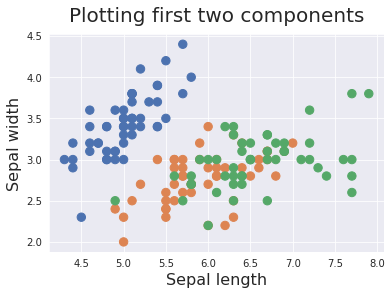

In [ ]:
plot_iris_2d(
    df = df_iris,
    x = df_iris['sepal_length'],
    y = df_iris['sepal_width'],
    title = 'Plotting first two components',
    xlabel = 'Sepal length',
    ylabel = 'Sepal width')

In [ ]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
tsne = TSNE(n_components=2,n_iter=500, random_state=0)
points = tsne.fit_transform(df_iris[features])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
points

array([[  7.07507   ,  19.002937  ],
       [  6.4832535 ,  16.6175    ],
       [  5.724067  ,  16.606174  ],
       [  5.4356985 ,  16.495203  ],
       [  6.719931  ,  19.227556  ],
       [  7.276566  ,  21.040974  ],
       [  5.0656524 ,  17.126816  ],
       [  6.501744  ,  18.435059  ],
       [  5.5658674 ,  15.609177  ],
       [  6.2887053 ,  17.107327  ],
       [  7.732669  ,  20.320578  ],
       [  5.684796  ,  18.039398  ],
       [  6.2393684 ,  16.375134  ],
       [  5.1552334 ,  15.439497  ],
       [  8.326236  ,  21.469893  ],
       [  7.895447  ,  21.84516   ],
       [  7.7403727 ,  20.976467  ],
       [  6.9317555 ,  19.146397  ],
       [  8.26248   ,  20.934486  ],
       [  6.8285165 ,  20.284206  ],
       [  8.120294  ,  19.46596   ],
       [  6.6698985 ,  19.990547  ],
       [  7.758914  ,  16.612553  ],
       [  5.611645  ,  19.173199  ],
       [  5.0614595 ,  18.308207  ],
       [  6.5972395 ,  16.98219   ],
       [  5.945486  ,  18.91755   ],
 

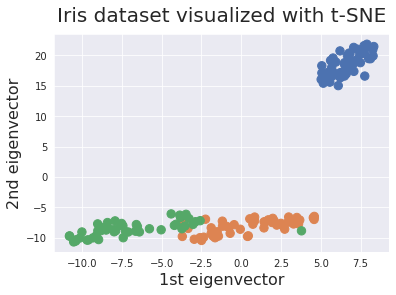

In [ ]:
plot_iris_2d(
    df = df_iris,
    x = points[:,0],
    y = points[:,1],
    title = 'Iris dataset visualized with t-SNE')

In [ ]:
tsne = TSNE(n_components=3,n_iter=5000, random_state=0)
points = tsne.fit_transform(df_iris[features])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
points.shape

(150, 3)

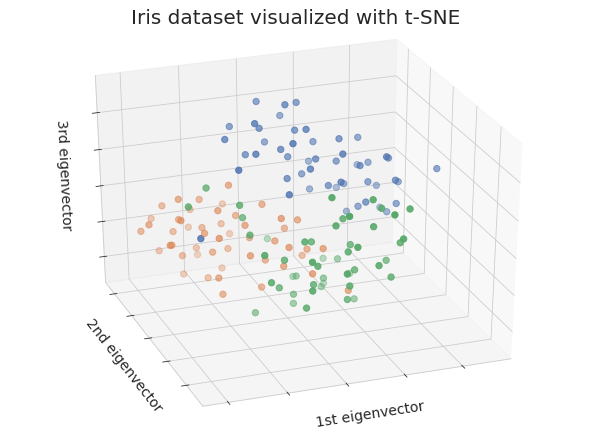

In [ ]:
plot_iris_3d(
    df = df_iris,
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    title = "Iris dataset visualized with t-SNE")

## 5 - Data Wrangling

In [ ]:
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,
,,,
13.0,14.0,15.0,16.0'''

In [ ]:
df_test = ...
df_test

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN
3,NaN,NaN,NaN,NaN
4,13.0,14.0,15.0,16.0


Accessing the underlying `numpy values` of the dataframe, using `.values

In [ ]:
df_test...

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan],
       [nan, nan, nan, nan],
       [13., 14., 15., 16.]])

We use the `info()` method to print a summary of the DataFrame and to check data the types and to verify that its content is non-null.

In [ ]:
df_test...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       4 non-null      float64
 2   C       3 non-null      float64
 3   D       3 non-null      float64
dtypes: float64(4)
memory usage: 288.0 bytes


We can decide to process only the data features that are complete by removing the rows containing missing values:

In [ ]:
df_test...

,A,B,C,D
0,1.0,2.0,3.0,4.0
4,13.0,14.0,15.0,16.0


We can also decide to remove the rows associated to a Nan value along a specific column:

In [ ]:
df_test...

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN
4,13.0,14.0,15.0,16.0


By using sklearn, we can fill missing values using data [Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) 

In [ ]:
imr = SimpleImputer(..., ...)
imr = ...
imputed_data = ...

In [ ]:
imputed_data

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        , 10.        ,  8.        ],
       [10.        , 11.        , 12.        ,  9.33333333],
       [ 7.25      ,  8.25      , 10.        ,  9.33333333],
       [13.        , 14.        , 15.        , 16.        ]])

In [ ]:
df_test.fillna(...)

,A,B,C,D
0,1.00,2.00,3.0,4.000000
1,5.00,6.00,10.0,8.000000
2,10.00,11.00,12.0,9.333333
3,7.25,8.25,10.0,9.333333
4,13.00,14.00,15.0,16.000000


## 6 - Data Normalisation

For the next exercise, we'll use the [Wine Dataset](https://archive.ics.uci.edu/ml/datasets/wine), which is used for multi-classification tasks

In [ ]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

In [ ]:
df_wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

In [ ]:
df_wine.columns = columns

In [ ]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


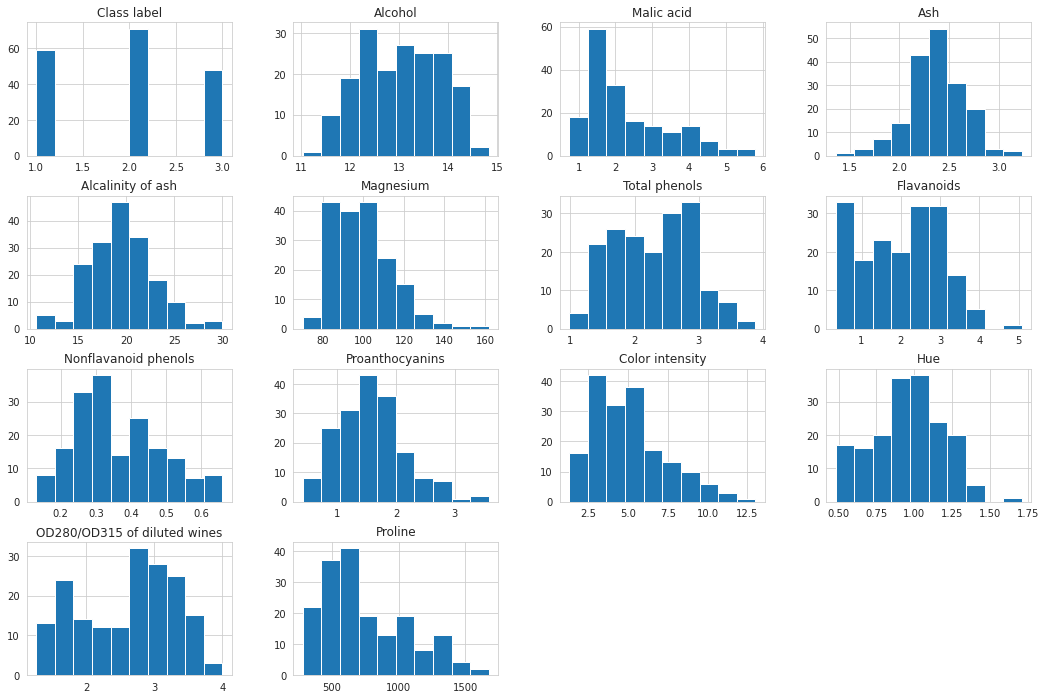

In [ ]:
df_wine.hist()
fig=plt.gcf()
fig.set_size_inches(18,12)
plt.show()

for Random Forest normalization and standardisation is not important, since we look just one feature and the feature are independend.

In [ ]:
X_wine = df_wine.values

In [ ]:
X_wine.shape

(178, 14)

In [ ]:
mms = MinMaxScaler()
X_wine_norm = mms.fit_transform(X_wine)

In [ ]:
df_wine_norm = pd.DataFrame(data = X_wine_norm, 
                  columns=columns)

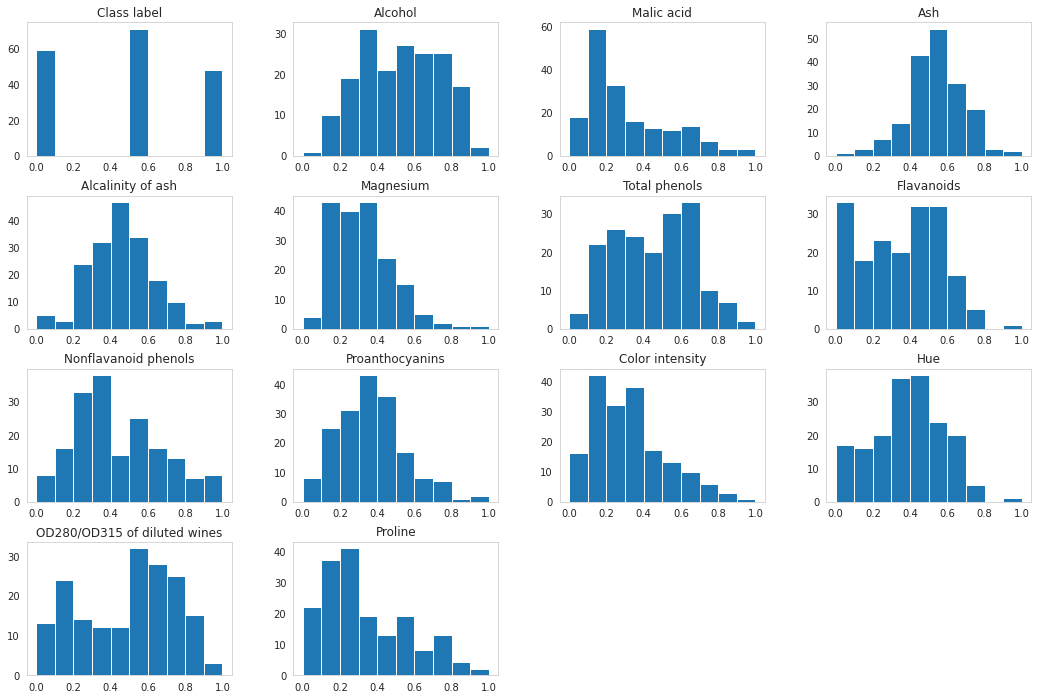

In [ ]:
df_wine_norm.hist(grid=False)
fig=plt.gcf()
fig.set_size_inches(18,12)
plt.show()

In [ ]:
stdsc = StandardScaler()
X_wine_std = stdsc.fit_transform(df_wine)

In [ ]:
X_wine_std.shape

(178, 14)

In [ ]:
df_wine_std = pd.DataFrame(data=X_wine_std, 
                  columns=columns)

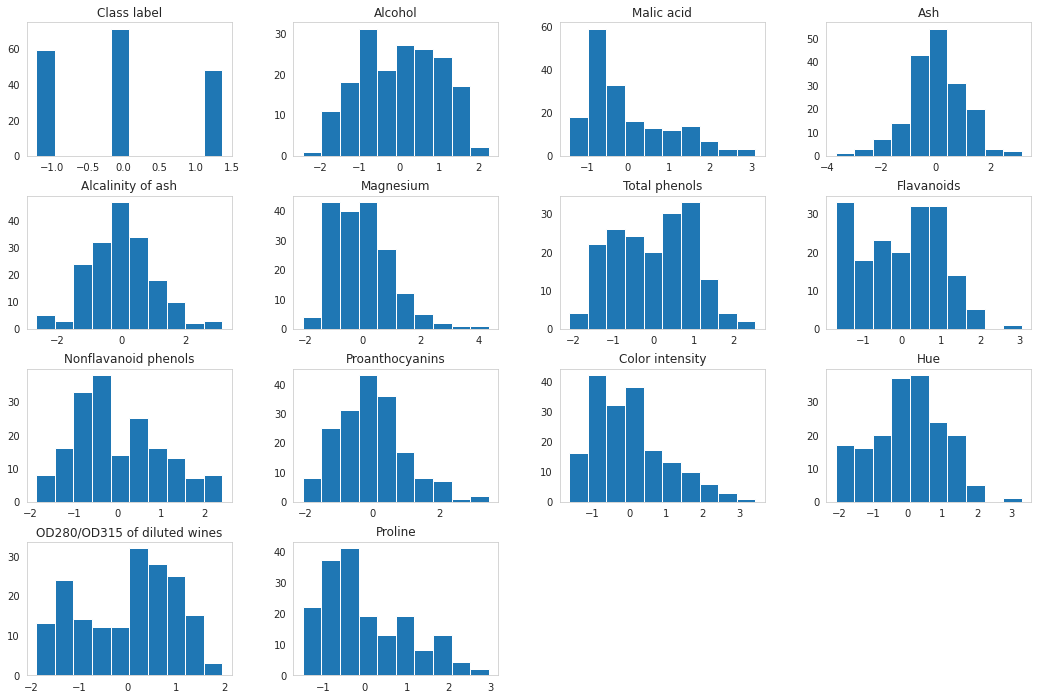

In [ ]:
df_wine_std.hist(grid=False)
fig=plt.gcf()
fig.set_size_inches(18,12)
plt.show()